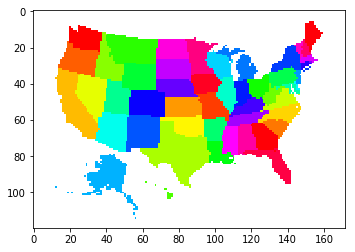

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import io
import matplotlib.pyplot as plt
import sys
import math

img = mpimg.imread('usa_vs.png')
#img = img[:40,:int(172/3),:]
#img[40,:,:] = 0
#img[:,57,:] = 0
#img[:,114,:] = 0

#io.imsave("dens_eq.png", img)
imgplot = plt.imshow(img)
plt.show();

In [2]:
for N in range(1,20):
    size_x = math.floor(np.sqrt(N))
    print("N=%d: %dx%d, idle: %d " %(N, size_x, math.floor(N/size_x), N % size_x))

N=1: 1x1, idle: 0 
N=2: 1x2, idle: 0 
N=3: 1x3, idle: 0 
N=4: 2x2, idle: 0 
N=5: 2x2, idle: 1 
N=6: 2x3, idle: 0 
N=7: 2x3, idle: 1 
N=8: 2x4, idle: 0 
N=9: 3x3, idle: 0 
N=10: 3x3, idle: 1 
N=11: 3x3, idle: 2 
N=12: 3x4, idle: 0 
N=13: 3x4, idle: 1 
N=14: 3x4, idle: 2 
N=15: 3x5, idle: 0 
N=16: 4x4, idle: 0 
N=17: 4x4, idle: 1 
N=18: 4x4, idle: 2 
N=19: 4x4, idle: 3 


7 8
0 357 357 357 357 374 374 374 374 
1 357 357 357 357 374 374 374 374 
2 357 357 357 357 374 374 374 374 
3 357 357 357 357 374 374 374 374 
4 357 357 357 357 374 374 374 374 
5 357 357 357 357 374 374 374 374 
6 378 378 378 378 396 396 396 396 
120 172
120 172


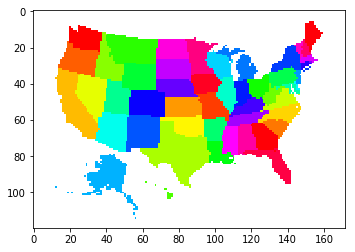

In [3]:
size = 60
m,n,z = img.shape
size_m = math.floor(np.sqrt(size))
size_n = math.floor(size/size_m)
print(size_m, size_n)
    
stepm = int(math.floor(m/size_m))
stepn = int(math.floor(n/size_n))

check = np.zeros((m,n,3))
    
for rank_m in range(size_m):
    print(rank_m, end =" ")
    for rank_n in range(size_n):
        e_startm = (m % size_m)-(size_m-rank_m)   if (m % size_m > size_m-rank_m)   else 0
        e_startn = (n % size_n)-(size_n-rank_n)   if (n % size_n > size_n-rank_n)   else 0
        e_endm   = (m % size_m)-(size_m-rank_m-1) if (m % size_m > size_m-rank_m-1) else 0
        e_endn   = (n % size_n)-(size_n-rank_n-1) if (n % size_n > size_n-rank_n-1) else 0
        
        startm = rank_m*stepm     + e_startm
        startn = rank_n*stepn     + e_startn  
        endm   = (rank_m+1)*stepm + e_endm
        endn   = (rank_n+1)*stepn + e_endn
        
        for i in range(startm,endm):
            for j in range(startn,endn):
                check[i,j,:] = img[i,j,:]
        print((endm-startm)*(endn-startn), end =" ")
    print("")
    
plt.imshow(check);
print(m, n)
print(endm, endn)

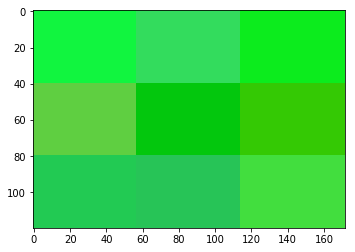

In [151]:
size = 9
size_m = math.floor(np.sqrt(size))
size_n = math.floor(size/size_m)

stepm = int(math.floor(m/size_m))
stepn = int(math.floor(n/size_n))

img = mpimg.imread('usa_vs.png')
check = np.zeros((m,n,3))

for rank in range(size_n*size_m):
    rank_n = math.floor(rank/size_m)
    rank_m = rank % size_m
    
    e_startm = (m % size_m)-(size_m-rank_m)   if (m % size_m > size_m-rank_m)   else 0
    e_startn = (n % size_n)-(size_n-rank_n)   if (n % size_n > size_n-rank_n)   else 0
    e_endm   = (m % size_m)-(size_m-rank_m-1) if (m % size_m > size_m-rank_m-1) else 0
    e_endn   = (n % size_n)-(size_n-rank_n-1) if (n % size_n > size_n-rank_n-1) else 0
        
    startm = rank_m*stepm     + e_startm
    startn = rank_n*stepn     + e_startn  
    endm   = (rank_m+1)*stepm + e_endm
    endn   = (rank_n+1)*stepn + e_endn
    
    color = np.array([np.random.choice(range(100))/255,0.75+np.random.choice(range(63))/255,np.random.choice(range(100))/255])
    for i in range(startm,endm):
        for j in range(startn,endn):
            check[i,j,:] = color
    

plt.imshow(check);

In [148]:
print(m, n)
print(startn, endn)

120 172
86 172


(rank_n != startn) (0, 0) 57
(rank_n != startn) (0, 0) 40
(0, 40) (0, 57) 57
(rank_n != startn) (1, 0) 57
(rank_n != 0) (1, 0) 39
(rank_n != startn) (1, 0) 80
(40, 80) (0, 57) 57
(rank_n != startn) (2, 0) 57
(rank_n != 0) (2, 0) 79
(80, 120) (0, 57) 57
(rank_n != 0) (0, 1) 56
(rank_n != startn) (0, 1) 114
(rank_n != startn) (0, 1) 40
(0, 40) (57, 114) 57
(rank_n != 0) (1, 1) 56
(rank_n != startn) (1, 1) 114
(rank_n != 0) (1, 1) 39
(rank_n != startn) (1, 1) 80
(40, 80) (57, 114) 57
(rank_n != 0) (2, 1) 56
(rank_n != startn) (2, 1) 114
(rank_n != 0) (2, 1) 79
(80, 120) (57, 114) 57
(rank_n != 0) (0, 2) 113
(rank_n != startn) (0, 2) 40
(0, 40) (114, 172) 58
(rank_n != 0) (1, 2) 113
(rank_n != 0) (1, 2) 39
(rank_n != startn) (1, 2) 80
(40, 80) (114, 172) 58
(rank_n != 0) (2, 2) 113
(rank_n != 0) (2, 2) 79
(80, 120) (114, 172) 58


/home/ben/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


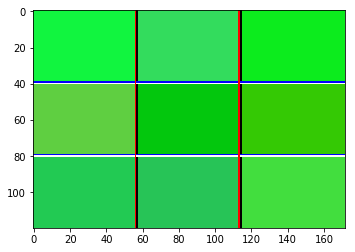

In [152]:
temp = np.copy(check)

for rank in range(size_n*size_m):
    rank_n = math.floor(rank/size_m)
    rank_m = rank % size_m
    
    e_startm = (m % size_m)-(size_m-rank_m)   if (m % size_m > size_m-rank_m)   else 0
    e_startn = (n % size_n)-(size_n-rank_n)   if (n % size_n > size_n-rank_n)   else 0
    e_endm   = (m % size_m)-(size_m-rank_m-1) if (m % size_m > size_m-rank_m-1) else 0
    e_endn   = (n % size_n)-(size_n-rank_n-1) if (n % size_n > size_n-rank_n-1) else 0
        
    startm = rank_m*stepm     + e_startm
    startn = rank_n*stepn     + e_startn  
    endm   = (rank_m+1)*stepm + e_endm
    endn   = (rank_n+1)*stepn + e_endn
    
    #receive data from left
    if(rank_n != 0):
        temp[startm:endm,startn-1,:] = np.array([1,0,0])
        print("(rank_n != 0)", (rank_m,rank_n), startn-1)
    if(rank_n != size_n-1):
        temp[startm:endm,endn,:] = np.array([0,0,0])
        print("(rank_n != startn)", (rank_m,rank_n), endn)
    if(rank_m != 0):
        temp[startm-1,startn:endn,:] = np.array([0,0,1])
        print("(rank_n != 0)", (rank_m,rank_n), startm-1)
    if(rank_m != size_m-1):
        temp[endm,startn:endn,:] = np.array([1,1,1])
        print("(rank_n != startn)", (rank_m,rank_n), endm)
        
    print((startm,endm), (startn,endn), endn-startn)
        
plt.imshow(temp);
io.imsave("dens_eq.png",temp);
io.imsave("check.png",check);

In [139]:
size_n

3

In [140]:
endn

172

In [141]:
for rank in range(size_n*size_m):
    rank_n = math.floor(rank/size_m)
    rank_m = rank % size_m
    print(rank, rank_n, rank_m, rank_n*(size_m)+rank_m)

0 0 0 0
1 1 0 1
2 2 0 2


In [137]:
temp[119,startn:endn,:]

array([[0.        , 0.        , 0.        ],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.16078431, 0.84019608, 0.33333333],
       [0.